# Logistic Regression

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.


We'll use a "semi-cleaned" version of the titanic data set.

## Importing Libraries

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Titanic_train = pd.read_csv('C:/Users/shmhatre/Desktop/Udemy/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [3]:
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

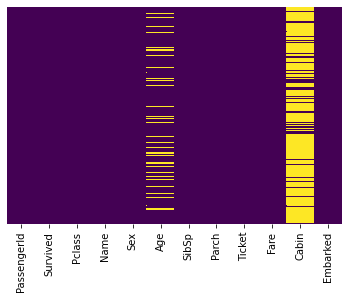

In [4]:
sns.heatmap(Titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Every null values shown by yellow color. We are missing some age information and lot of onformation from cabin column.

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

In [5]:
sns.set_style('whitegrid') #setting style

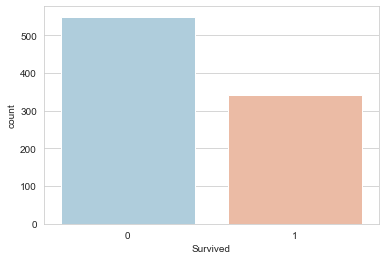

In [6]:
#To check the ratio of target varibles using countplot
sns.countplot(x='Survived',data=Titanic_train,palette='RdBu_r')

Here, countplot shows 0 not survived v/s 1 survived. The percentage of not survived is more than the survived once.

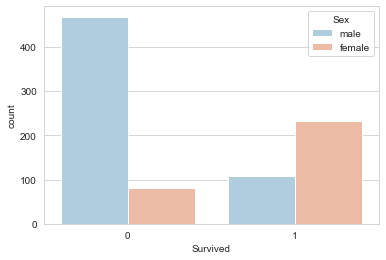

In [7]:
# Countplot based on sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=Titanic_train,palette='RdBu_r')

From countplot of survived with comparision of Sex percentage, we can see the passengers who are not survived are more male and on the other side the passengers who survived, more than half are female.

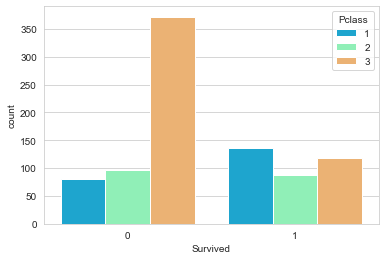

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Titanic_train,palette='rainbow')

From countplot of survived with class percenatage , we can see the that passenger from 3rd class are more in not survied category. 

C:\Users\shmhatre\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


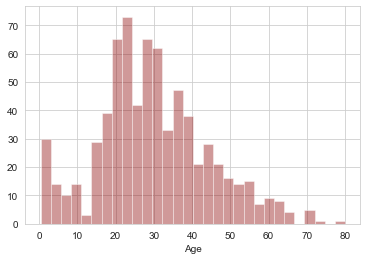

In [9]:
# Distribution of age of passenger on the Titanic
sns.distplot(Titanic_train['Age'].dropna(),kde=False,color='darkred',bins=30)

#### Alternate method of plotting the same with histogram directly on the dataset and variable name (Age)

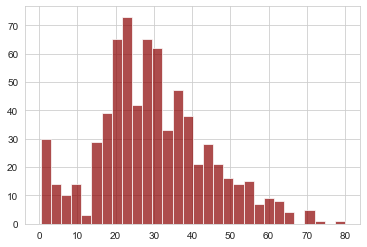

In [10]:
#Alternate method of plotting the same with histogram directly on the dataset and varioable name
Titanic_train['Age'].hist(bins=30,color='darkred',alpha=0.7)

### Exploring the other column in the dataset, Number of sibling and Spouse in the dataset (SibSp)

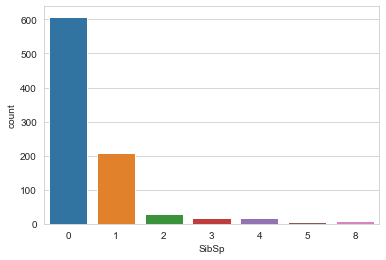

In [11]:
sns.countplot(x='SibSp',data=Titanic_train)

From Countplot on SibSp, shows the most passenger onboard neither children or a spouse on board. (probably men in the third class)

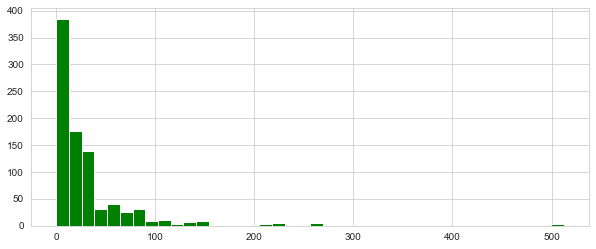

In [12]:
# Distibution of fare column to see how much people are paying
Titanic_train['Fare'].hist(color='green',bins=40,figsize=(10,4))

# Data 

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we will find the other way to do this action by calculating the avergae age by passenger classpassenger class. For example:

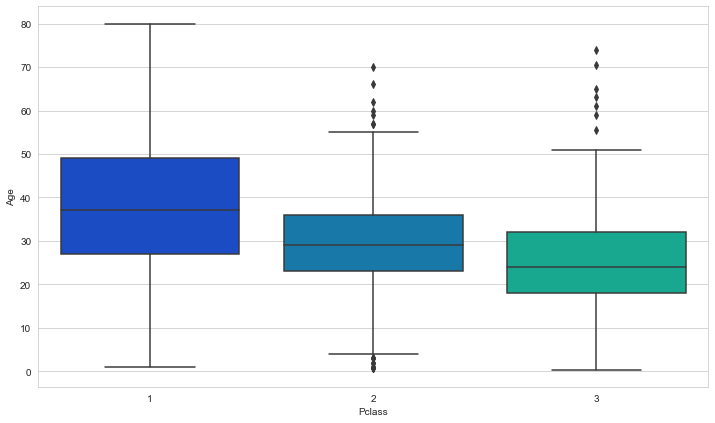

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=Titanic_train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

We will create function to do this:
Calculate the averge age by class using the pandas or ploting the boxplot on plotly.

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

We will apply this function to data set

In [19]:
Titanic_train['Age'] = Titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

We will check the heatmap again !


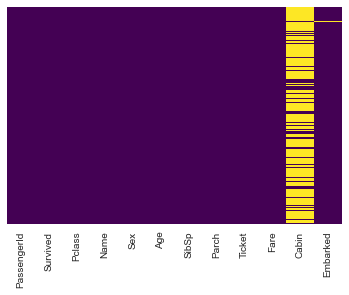

In [20]:
sns.heatmap(Titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We reaonably set the age value based on their class.

Now we will drop the Cabin column and the row in Embarked that is NaN

In [21]:
Titanic_train.drop('Cabin',axis=1,inplace=True)

In [22]:
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Drop all null values
Titanic_train.dropna(inplace=True)

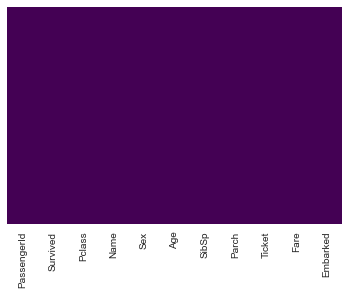

In [24]:
sns.heatmap(Titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, we do not have any missing values

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We have two categorical variables (sex, embarked, pclass) and we need to convert to dummy varibale for ML algorithm

In [26]:
sex = pd.get_dummies(Titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(Titanic_train['Embarked'],drop_first=True)
pclass =pd.get_dummies(Titanic_train['Pclass'],drop_first=True)

In [27]:
Titanic_train = pd.concat([Titanic_train, sex, embark, pclass], axis =1)

Now drop the original coulumns sex, embarked, Name and Ticket from dataset

In [28]:
Titanic_train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

We also dropped the PassengerId column.

In [29]:
Titanic_train.drop('PassengerId', axis=1, inplace =True)

In [30]:
Titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Now our data is ready for our model

# Building a Logistic Regression model¶

Let's start by splitting our data into a training set and test set

# Train Test Split

In [31]:
X = Titanic_train.drop('Survived', axis=1)
y = Titanic_train['Survived']   

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [34]:
#(y_test)

# Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
#Creating instance of logistic regression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

C:\Users\shmhatre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

# Model Evauation

We can check precision, recall, f1-score using classification report!

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



We have the accuracy of prediction is about 83% and can be improve by doing feature engineering and considering more 
features for prediction.